<a href="https://colab.research.google.com/github/joeldcosta/AI-Music-Generator/blob/main/Remove_Silent_in_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Remove Audio Silence In Python

In [ ]:
#@markdown Install PIP and SUDO and install
!pip install webrtcvad==2.0.10 wave pydub simpleaudio numpy matplotlib
!sudo apt-get install ffmpeg 
!sudo apt-get install -y python-pydub

In [ ]:
#@markdown #Upload Your Audio
from google.colab import files
uploaded = files.upload()

In [ ]:
#@markdown Convert MP3 to WAV Format 👇Copy Paste File Name here
# import required modules
from os import path
from pydub import AudioSegment

# assign files
input_file = "" #@param {type:"string"}
output_file = "result.wav" 

# convert mp3 file to wav file
sound = AudioSegment.from_mp3(input_file)
sound.export(output_file, format="wav")


In [ ]:
#@markdown Download Silence Remover File
!wget https://raw.githubusercontent.com/joeldcosta/Audio-Silence-Remover/main/silenceremove.py

In [ ]:
#@markdown Remove Silent
!python "silenceremove.py" 3 "result.wav"

In [ ]:
#@markdown Convert WAV to MP3
from pydub import AudioSegment

AudioSegment.from_wav("Non-Silenced-Audio.wav").export("FINAL.mp3", format="mp3")

In [ ]:
#@markdown Download FINAL.mp3
from google.colab import files
files.download('FINAL.mp3')

Time Line - Before


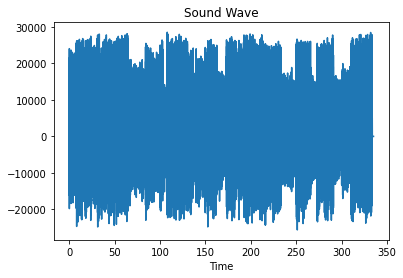

Time Line - After


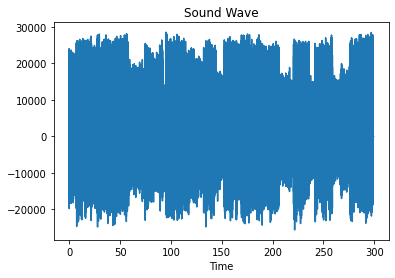

In [5]:
#@markdown Comparing Plot Size
import matplotlib.pyplot as plt
import numpy as np
import wave, sys

# shows the sound waves
def visualize(path: str):

	# reading the audio file
	raw = wave.open(path)
	
	# reads all the frames
	# -1 indicates all or max frames
	signal = raw.readframes(-1)
	signal = np.frombuffer(signal, dtype ="int16")
	
	# gets the frame rate
	f_rate = raw.getframerate()

	# to Plot the x-axis in seconds
	# you need get the frame rate
	# and divide by size of your signal
	# to create a Time Vector
	# spaced linearly with the size
	# of the audio file
	time = np.linspace(
		0, # start
		len(signal) / f_rate,
		num = len(signal)
	)

	# using matplotlib to plot
	# creates a new figure
	plt.figure(1)
	
	# title of the plot
	plt.title("Sound Wave")
	
	# label of x-axis
	plt.xlabel("Time")
	
	# actual plotting
	plt.plot(time, signal)
	
	# shows the plot
	# in new window
	plt.show()

	# you can also save
	# the plot using
	# plt.savefig('filename')

# gets the command line Value
path = "result.wav"
print("Time Line - Before")
visualize(path)

path = "Non-Silenced-Audio.wav"
print("Time Line - After")
visualize(path)


In [74]:
#@markdown Clear Files
!rm -f "Non-Silenced-Audio.wav"
!rm -f "result.wav"
!rm -f "FINAL.mp3"